In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("../resources/MY2022 Fuel Consumption Ratings.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [36]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [37]:
df.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


모델 연도, 연료 사용량(도시, 고속도로), 모델 명은 제외시킨다.

In [38]:
df_sort = df[df.columns.drop(['Model Year','Fuel Consumption (City (L/100 km)', 
            'Fuel Consumption(Hwy (L/100 km))', 'Model'])]
            
df_sort.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,Acura,Compact,2.4,4,AM8,Z,8.6,33,200,6,3
1,Acura,SUV: Small,3.5,6,AS10,Z,11.2,25,263,4,5
2,Acura,SUV: Small,2.0,4,AS10,Z,9.9,29,232,5,6
3,Acura,SUV: Small,2.0,4,AS10,Z,10.3,27,242,5,6
4,Acura,Compact,2.0,4,AS10,Z,9.8,29,230,5,7


train 셋과 test 셋을 만들어 놈

OridanalEncoder를 사용하여 브랜듬명, 자동차 클래스,연료 타입과 transmission을 숫자로 인코딩함. Ordianl encoder는 label encoder와 작동방식이 비슷하지만, 2차원 배열애서 효용성 있게 쓰이기 때문에 해당 방식을 채택하였음.
하단 결과에 나오는 오류는 복사를 하면서 기존 데이터의 변환에도 영향을 미쳤기 때문에 Warning이 발생함. 그러나 이 데이터의 경우 원본도 변형시키려고 하는거기 때문에 해당 warning은 무시해도 상관이 없음.
출력이 되는 것은 인코딩 과정이 끝난 분류된 데이터프레임임.

In [39]:
z = df_sort[['Make','Vehicle Class', 'Transmission', 'Fuel Type']]

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
z = enc.fit_transform(z)
z_res = pd.DataFrame(z)
df_sort[['Make','Vehicle Class', 'Transmission', 'Fuel Type']] = z_res
df_sort

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,0.0,0.0,2.4,4,7.0,3.0,8.6,33,200,6,3
1,0.0,7.0,3.5,6,8.0,3.0,11.2,25,263,4,5
2,0.0,7.0,2.0,4,8.0,3.0,9.9,29,232,5,6
3,0.0,7.0,2.0,4,8.0,3.0,10.3,27,242,5,6
4,0.0,0.0,2.0,4,8.0,3.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...
941,38.0,7.0,2.0,4,12.0,3.0,9.4,30,219,5,5
942,38.0,7.0,2.0,4,12.0,3.0,9.4,30,219,5,5
943,38.0,7.0,2.0,4,12.0,3.0,9.9,29,232,5,7
944,38.0,8.0,2.0,4,12.0,3.0,10.1,28,236,5,5


In [40]:
df_num = df_sort[['Engine Size(L)', 'Cylinders', 
                 'Fuel Consumption(Comb (L/100 km))','Fuel Consumption(Comb (mpg))',
                  'CO2 Emissions(g/km)']]
df_cat = df_sort[['Make', 'Vehicle Class', 'Fuel Type', 'Transmission']]
df_rate = df_sort[['Smog Rating', 'CO2 Rating']]
df_rate

,Smog Rating,CO2 Rating
0,3,6
1,5,4
2,6,5
3,6,5
4,7,5
...,...,...
941,5,5
942,5,5
943,7,5
944,5,5


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_num)
df_scaled = scaler.transform(df_num)
df_scaled_df = pd.DataFrame(df_scaled, columns=['Engine Size(L)', 'Cylinders', 
                 'Fuel Consumption(Comb (L/100 km))','Fuel Consumption(Comb (mpg))',
                  'CO2 Emissions(g/km)'])
df_scaled_df

,Engine Size(L),Cylinders,Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km)
0,-0.581281,-0.863551,-0.866881,0.748929,-0.918695
1,0.219250,0.171835,0.037543,-0.292581,0.059428
2,-0.872384,-0.863551,-0.414669,0.228174,-0.421871
3,-0.872384,-0.863551,-0.275527,-0.032203,-0.266613
4,-0.872384,-0.863551,-0.449455,0.228174,-0.452922
...,...,...,...,...,...
941,-0.872384,-0.863551,-0.588597,0.358363,-0.623706
942,-0.872384,-0.863551,-0.588597,0.358363,-0.623706
943,-0.872384,-0.863551,-0.414669,0.228174,-0.421871
944,-0.872384,-0.863551,-0.345098,0.097986,-0.359768


In [42]:
df_result_sum = pd.concat([df_scaled_df, df_cat], axis = 1)
df_result_sum.loc[[10,11,12],:]

,Engine Size(L),Cylinders,Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),Make,Vehicle Class,Fuel Type,Transmission
10,-0.217404,0.171835,0.176686,-0.422769,0.183634,1.0,2.0,3.0,3.0
11,-0.872384,-0.863551,-0.623382,0.358363,-0.639231,1.0,7.0,3.0,3.0
12,-0.872384,-0.863551,-0.519026,0.228174,-0.515025,1.0,7.0,3.0,3.0


해당 부분에서는 train과 test에 대해서  x train은 전반적인 column의 경우, y train은 c02 rating,  smog rating으로 하여 2가지의 case로 구분하였음.
train_1은 c02 ratin에 관한 데이터,
train_2는 smog rating에 관한 데이터를 나타냄.

In [43]:
from sklearn.model_selection import train_test_split
target_co2 = df_rate.pop('CO2 Rating')
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_result_sum, target_co2, 
                                                            test_size = 0.2, random_state = 0)

target_smog = df_rate.pop('Smog Rating')
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_result_sum, target_smog, 
                                                            test_size = 0.2, random_state = 0)

In [44]:
print(X_train_1.shape)
print(y_train_1.shape)
print(X_test_1.shape)
print(y_test_1.shape)

print(X_train_2.shape)
print(y_train_2.shape)
print(X_test_2.shape)
print(y_test_2.shape)
X_train_1

(756, 9)
(756,)
(190, 9)
(190,)
(756, 9)
(756,)
(190, 9)
(190,)


,Engine Size(L),Cylinders,Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),Make,Vehicle Class,Fuel Type,Transmission
79,0.874230,1.207220,0.315828,-0.422769,0.307840,4.0,1.0,3.0,12.0
687,-0.144628,0.171835,-0.240741,-0.032203,-0.235562,29.0,8.0,3.0,4.0
181,2.184190,1.207220,1.324609,-1.073713,1.394643,9.0,12.0,3.0,21.0
744,-1.163486,-0.863551,-1.527807,1.920628,-1.570777,31.0,0.0,2.0,14.0
215,1.529210,1.207220,1.150682,-0.943525,1.239386,9.0,6.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...
835,1.820312,1.207220,0.907183,-0.813336,0.990974,33.0,6.0,2.0,3.0
192,-1.236261,-0.863551,-0.797310,0.618741,-0.794489,9.0,7.0,2.0,1.0
629,0.437577,1.207220,1.324609,-1.073713,1.379118,27.0,1.0,3.0,3.0
559,1.456434,2.242605,1.602894,-1.203902,1.736210,22.0,13.0,3.0,6.0


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [46]:
feature_names = ['Engine Size(L)', 'Cylinders', 
                 'Fuel Consumption(Comb (L/100 km))','Fuel Consumption(Comb (mpg))',
                  'CO2 Emissions(g/km)', 'Make', 'Vehicle Class', 'Fuel Type', 'Transmission'] # X variable
X_names = df_result_sum[feature_names] # set col names (scaled)
Y_names = df['CO2 Rating'] # label to predit

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X_names, Y_names, random_state = 0) #split train & test

In [48]:
knn = KNeighborsClassifier(n_neighbors = 30) # n^(1/2)
knn.fit(X_train, Y_train) #fitting KNN

KNeighborsClassifier(n_neighbors=30)

In [49]:
# check performance of the training set
print("Accurancy of KNN classifier -> Training set : {:.2f}".format(knn.score(X_train, Y_train)))
# check performance of the test set
print("Accurancy of KNN classifier -> Test set : {:.2f}".format(knn.score(X_test, Y_test)))

Accurancy of KNN classifier -> Training set : 0.49
Accurancy of KNN classifier -> Test set : 0.53


In [50]:
# Predicton
example_car = [[2.0, 4, 9.4, 30, 219, 38, 7.0, 3.0, 12.0]]
scale_data = []
non_scale_data = []
for i in range(5):
    scale_data.append(example_car[0][i])
for i in range(4):
    non_scale_data.append(example_car[0][i+5])
    

scale_data = [scale_data]
non_scale_data = [non_scale_data]

scaler.fit(scale_data)
example_car_scaled = scaler.transform(scale_data)
predict = np.concatenate([example_car_scaled, non_scale_data], axis = 1)


print("Predicted CO2 Rating for Example", example_car, " = ", knn.predict(predict))

Predicted CO2 Rating for Example [[2.0, 4, 9.4, 30, 219, 38, 7.0, 3.0, 12.0]]  =  [5]


---10 k fold 정확도---
교차 검증별 정확도 : [0.45263158 0.42105263 0.50526316 0.53684211 0.4        0.44210526
 0.35106383 0.4787234  0.41489362 0.38297872]

평균 검증 정확도 : 0.439


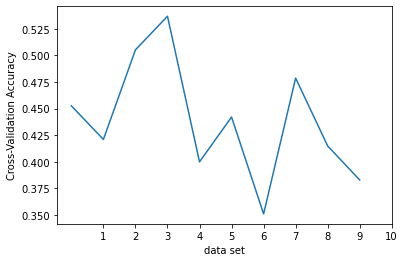

In [51]:
# import library
from sklearn.model_selection import KFold # k fold
from sklearn.model_selection import cross_val_score  # k fold Api

knn = KNeighborsClassifier(n_neighbors = 30) # n^(1/2)
features = df_result_sum[feature_names] # set col names (scaled)
target_co2_rating = df['CO2 Rating'] # label to predit

kfold = KFold(n_splits=10, shuffle=True ,random_state=0)
scores = cross_val_score(knn,features,target_co2,cv=kfold,scoring = "accuracy")    # 10-fold cross-validation

print("---10 k fold 정확도---")
print("교차 검증별 정확도 : " + '{}'.format(scores))
print("\n평균 검증 정확도 : " + '{:.3f}'.format(scores.mean()))

x = np.arange(0, 10)

plt.plot(x, scores)
plt.xlabel('data set')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(np.arange(1, 11))
plt.show()


k neighbors에 따른 평균검증정확도( k = 1 ~ 60 홀수)
[knn n_neighbors = 1 ]0.724
[knn n_neighbors = 3 ]0.639
[knn n_neighbors = 5 ]0.628
[knn n_neighbors = 7 ]0.589
[knn n_neighbors = 9 ]0.535
[knn n_neighbors = 11 ]0.505
[knn n_neighbors = 13 ]0.488
[knn n_neighbors = 15 ]0.478
[knn n_neighbors = 17 ]0.462
[knn n_neighbors = 19 ]0.467
[knn n_neighbors = 21 ]0.454
[knn n_neighbors = 23 ]0.458
[knn n_neighbors = 25 ]0.450
[knn n_neighbors = 27 ]0.442
[knn n_neighbors = 29 ]0.443
[knn n_neighbors = 31 ]0.444
[knn n_neighbors = 33 ]0.445
[knn n_neighbors = 35 ]0.441
[knn n_neighbors = 37 ]0.443
[knn n_neighbors = 39 ]0.444
[knn n_neighbors = 41 ]0.448
[knn n_neighbors = 43 ]0.429
[knn n_neighbors = 45 ]0.423
[knn n_neighbors = 47 ]0.423
[knn n_neighbors = 49 ]0.411
[knn n_neighbors = 51 ]0.418
[knn n_neighbors = 53 ]0.417
[knn n_neighbors = 55 ]0.417
[knn n_neighbors = 57 ]0.410
[knn n_neighbors = 59 ]0.408


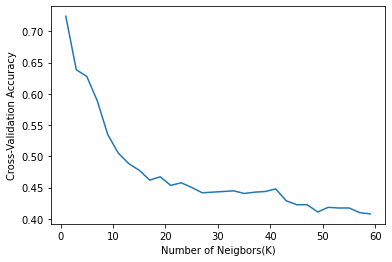

In [52]:
# import library
from sklearn.model_selection import KFold # k fold
from sklearn.model_selection import cross_val_score  # k fold Api


k_range = range(1,60,2)              # k를 1~60까지의 홀수 k(n_neighbors)
k_scores = []                        # 각 k들의 성능을 비교하기 위한 리스트생성.
kfold = KFold(n_splits=10, shuffle=True ,random_state=0)

print("k neighbors에 따른 평균검증정확도( k = 1 ~ 60 홀수)")
for k in k_range :
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,features,target_co2,cv=kfold,scoring = "accuracy")    # 10-fold cross-validation
    print("[knn n_neighbors = " + str(k)+ ' ]' + '{:.3f}'.format(scores.mean()))
    k_scores.append(scores.mean())                    # 10-fold 각각 정확도의 평균으로 성능계산 
    

plt.plot(k_range, k_scores)
plt.xlabel('Number of Neigbors(K)')
plt.ylabel('Cross-Validation Accuracy')
plt.show()